In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


In [305]:
headers=["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg" ,"Price"]
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"
df = pd.read_csv(filepath, names=headers)

In [306]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [307]:
df.replace("?", np.nan, inplace=True)

In [308]:
df.dtypes

,0
Manufacturer,object
Category,int64
Screen,object
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_inch,object
CPU_frequency,float64
RAM_GB,int64
Storage_GB_SSD,int64


In [309]:
df.describe(include='all')

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,234,238.000000,238.000000,238.000000,233,238.000000
unique,11,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,77,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,NaN,2.360084,7.882353,245.781513,NaN,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,NaN,0.411393,2.482603,34.765316,NaN,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      238 non-null    object 
 1   Category          238 non-null    int64  
 2   Screen            238 non-null    object 
 3   GPU               238 non-null    int64  
 4   OS                238 non-null    int64  
 5   CPU_core          238 non-null    int64  
 6   Screen_Size_inch  234 non-null    object 
 7   CPU_frequency     238 non-null    float64
 8   RAM_GB            238 non-null    int64  
 9   Storage_GB_SSD    238 non-null    int64  
 10  Weight_kg         233 non-null    object 
 11  Price             238 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.4+ KB


0.36666555892588515

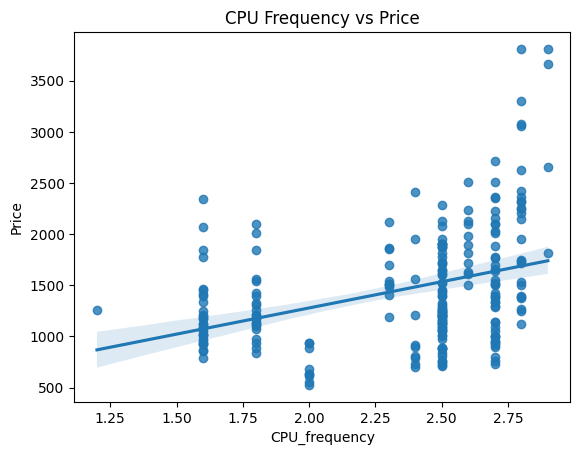

In [311]:
sns.regplot(x='CPU_frequency' ,y ='Price',data=df)
plt.title('CPU Frequency vs Price')
df['CPU_frequency'].corr(df['Price'])

In [312]:
to_obj=['OS','RAM_GB', 'GPU', 'OS', 'Storage_GB_SSD']
for i in to_obj:
  df[i]=df[i].astype(object)

In [313]:
df['Screen_Size_inch']=pd.to_numeric(df['Screen_Size_inch'], errors='coerce')
df['Weight_kg']=pd.to_numeric(df['Weight_kg'] ,errors='coerce')


Text(0.5, 1.0, 'Screen Size_inch vs price')

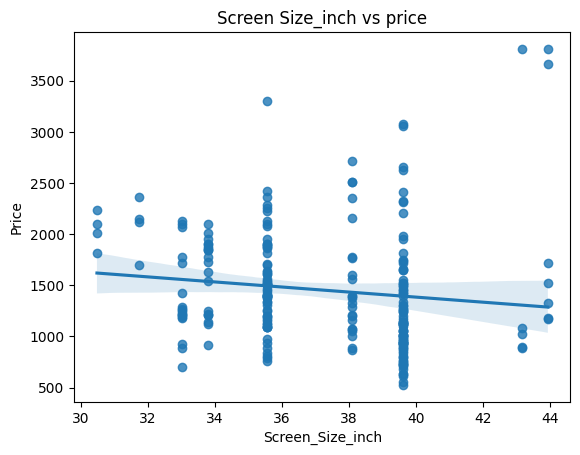

In [314]:
sns.regplot(x='Screen_Size_inch' ,y ='Price',data=df)
plt.title('Screen Size_inch vs price')

Text(0.5, 1.0, 'Weight kg vs price')

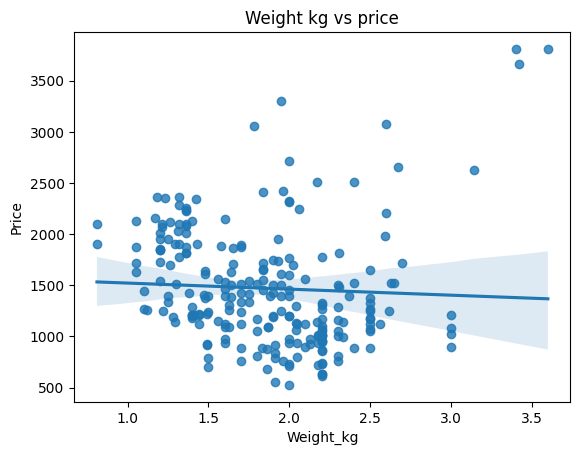

In [315]:
sns.regplot(x='Weight_kg', y='Price' , data=df)
plt.title('Weight kg vs price')

In [316]:
numeric_cols = ['CPU_frequency', 'Screen_Size_inch', 'Weight_kg']
df[numeric_cols].corrwith(df['Price'])

,0
CPU_frequency,0.366666
Screen_Size_inch,-0.128233
Weight_kg,-0.050707


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<Axes: xlabel='Category', ylabel='Price'>

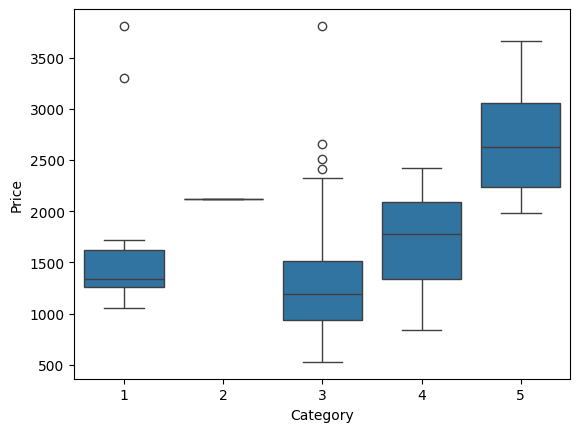

In [317]:
sns.boxplot(x='Category',y="Price", data=df)


<Axes: xlabel='GPU', ylabel='Price'>

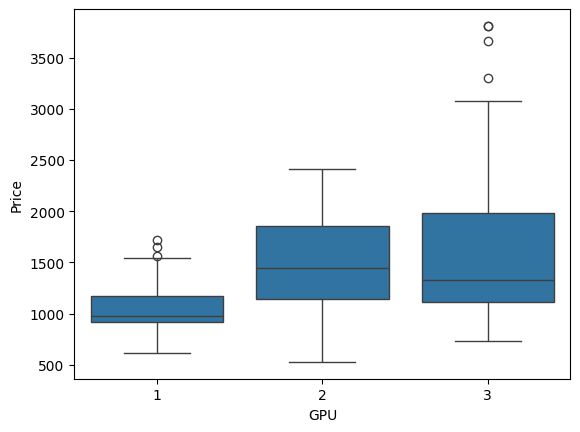

In [318]:
sns.boxplot(x='GPU',y="Price", data=df)


<Axes: xlabel='OS', ylabel='Price'>

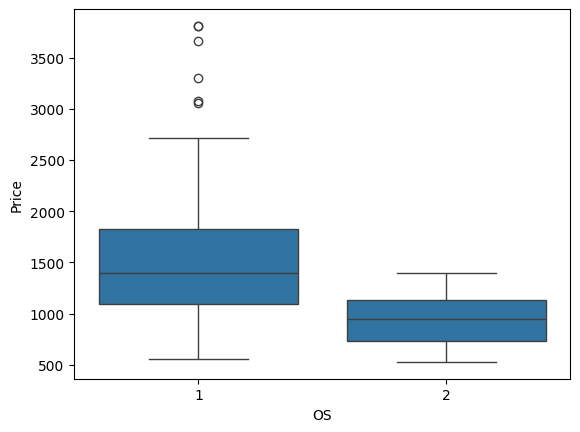

In [319]:
sns.boxplot(x="OS",y="Price",data=df)


<Axes: xlabel='CPU_core', ylabel='Price'>

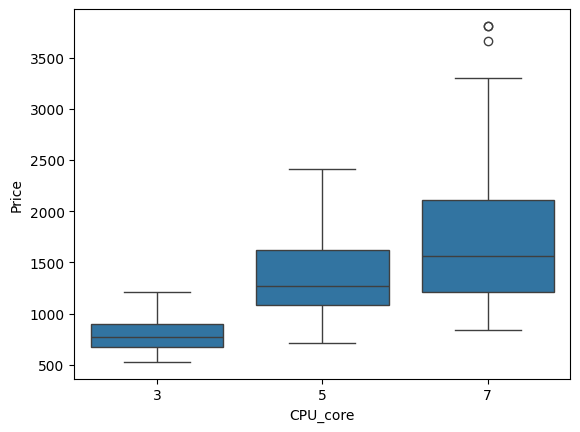

In [320]:

sns.boxplot(x='CPU_core',y="Price", data=df)


<Axes: xlabel='RAM_GB', ylabel='Price'>

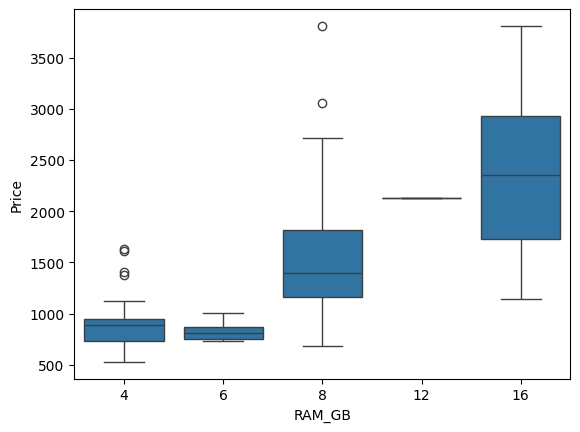

In [321]:
sns.boxplot(x='RAM_GB',y="Price", data=df)


In [322]:
df.GPU.value_counts()

,count
GPU,
2,136
3,69
1,33


<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

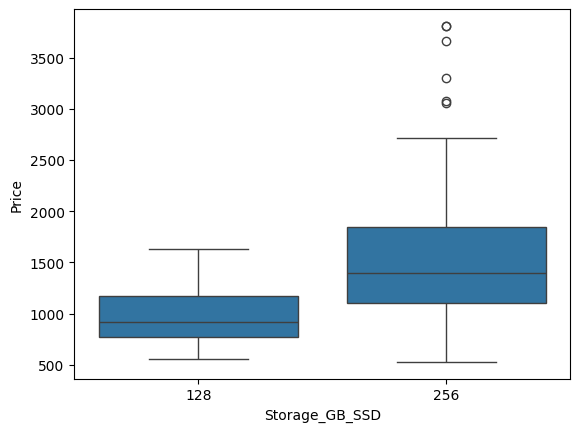

In [323]:
sns.boxplot(x='Storage_GB_SSD',y="Price", data=df)


#  Descriptive Statistical Analysis


In [324]:
df.describe(include='all')

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.0,238.0,238.000000,234.000000,238.000000,238.0,238.0,233.000000,238.000000
unique,11,NaN,2,3.0,2.0,NaN,NaN,NaN,5.0,2.0,NaN,NaN
top,Dell,NaN,Full HD,2.0,1.0,NaN,NaN,NaN,8.0,256.0,NaN,NaN
freq,71,NaN,161,136.0,224.0,NaN,NaN,NaN,184.0,219.0,NaN,NaN
mean,NaN,3.205882,NaN,NaN,NaN,5.630252,37.269615,2.360084,NaN,NaN,1.862232,1462.344538
std,NaN,0.776533,NaN,NaN,NaN,1.241787,2.971365,0.411393,NaN,NaN,0.494332,574.607699
min,NaN,1.000000,NaN,NaN,NaN,3.000000,30.480000,1.200000,NaN,NaN,0.810000,527.000000
25%,NaN,3.000000,NaN,NaN,NaN,5.000000,35.560000,2.000000,NaN,NaN,1.440000,1066.500000
50%,NaN,3.000000,NaN,NaN,NaN,5.000000,38.100000,2.500000,NaN,NaN,1.870000,1333.000000
75%,NaN,4.000000,NaN,NaN,NaN,7.000000,39.624000,2.700000,NaN,NaN,2.200000,1777.000000


#GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [325]:
df_test=df[[  "GPU", "CPU_core" , "Price"  ]]
df_grp=df_test.groupby(["GPU", "CPU_core"]  , as_index=False  ).mean()
df_grp

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [326]:
df_pivot=df_grp.pivot(index='GPU' , columns= 'CPU_core')
df_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

# Data Wrangling


 - Handle missing data in different ways
 - Correct the data type of different data values as per requirement
 - Standardize and normalize the appropriate data attributes
 - Visualize the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables



### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [327]:
df['Screen_Size_cm']=df['Screen_Size_inch']/2.54
df.drop(['Screen_Size_inch' ],axis=1,inplace=True)

df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_cm
0,Acer,4,IPS Panel,2,1,5,1.6,8,256,1.60,978,14.0
1,Dell,3,Full HD,1,1,3,2.0,4,256,2.20,634,15.6
2,Dell,3,Full HD,1,1,7,2.7,8,256,2.20,946,15.6
3,Dell,4,IPS Panel,2,1,5,1.6,8,128,1.22,1244,13.3
4,HP,4,Full HD,2,1,7,1.8,8,256,1.91,837,15.6


In [328]:
df['Screen_Size_cm']=df['Screen_Size_cm'].astype('float')
df['Weight_kg']=df['Weight_kg'].astype('float')

In [329]:
to_num=['Screen_Size_cm','Weight_kg' ]
for i in to_num:
  df[i]=pd.to_numeric(df[i], errors='coerce')

Note that we can update the `Screen_Size_cm` column such that all values are rounded to nearest 2 decimal places by using `numpy.round()`


In [330]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_cm
0,Acer,4,IPS Panel,2,1,5,1.6,8,256,1.60,978,14.0
1,Dell,3,Full HD,1,1,3,2.0,4,256,2.20,634,15.6
2,Dell,3,Full HD,1,1,7,2.7,8,256,2.20,946,15.6
3,Dell,4,IPS Panel,2,1,5,1.6,8,128,1.22,1244,13.3
4,HP,4,Full HD,2,1,7,1.8,8,256,1.91,837,15.6


In [331]:
df.isnull().sum()

,0
Manufacturer,0
Category,0
Screen,0
GPU,0
OS,0
CPU_core,0
CPU_frequency,0
RAM_GB,0
Storage_GB_SSD,0
Weight_kg,5


In [332]:
timpute=['Screen_Size_cm','Weight_kg']
for col in timpute:
  df[col]=df[col].fillna(df[col].mean())

In [333]:
timpute=['Screen_Size_cm','Weight_kg']
for col in timpute:
  df[col]=df[col].fillna(df[col].mode())

### Data Normalization


In [335]:
df['CPU_frequency']=df['CPU_frequency']/df['CPU_frequency'].max()
df['CPU_frequency'].min(), df['CPU_frequency'].max()

(0.41379310344827586, 1.0)

### Binning


In [336]:
df['Price'].dtype

dtype('int64')

In [337]:
Price_binned=np.linspace(min(df['Price']) , max(df['Price']) ,4)
g_names=["Low", "Medium" , "High"]
Price_binned
df['Price_binned']=pd.cut(df['Price'],Price_binned, labels=g_names  ,include_lowest=True)
df[['Price', 'Price_binned']].head(30)

,Price,Price_binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
5,1016,Low
6,1117,Low
7,866,Low
8,812,Low
9,1068,Low


In [338]:
df['Price_binned'].value_counts()

,count
Price_binned,
Low,160
Medium,72
High,6


plot the bar graph of these bins.


<Axes: xlabel='Price_binned', ylabel='count'>

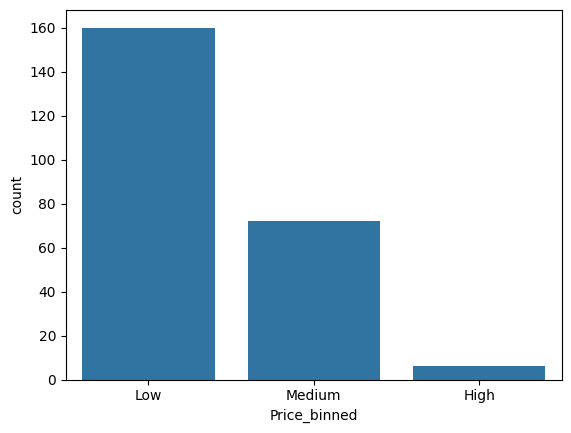

In [339]:
import seaborn as sns
sns.countplot(x='Price_binned', data=df)



### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [340]:
# Write your code below and press Shift+Enter to execute
df['Screen'].value_counts()

,count
Screen,
Full HD,161
IPS Panel,77


In [341]:
dummy_variables=pd.get_dummies(df['Screen'])
dummy_variables.head()

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [342]:
dummy_variables.rename(columns={'Full HD	':'Screen-Full_HD' ,'IPS Panel':'Screen-IPS_panel' },inplace=True)
df=pd.concat([df,dummy_variables],axis=1)

df.drop('Screen', axis=1,inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_cm,Price_binned,Full HD,Screen-IPS_panel
0,Acer,4,2,1,5,0.551724,8,256,1.60,978,14.0,Low,False,True
1,Dell,3,1,1,3,0.689655,4,256,2.20,634,15.6,Low,True,False
2,Dell,3,1,1,7,0.931034,8,256,2.20,946,15.6,Low,True,False
3,Dell,4,2,1,5,0.551724,8,128,1.22,1244,13.3,Low,False,True
4,HP,4,2,1,7,0.620690,8,256,1.91,837,15.6,Low,True,False


This version of the dataset, now finalized, is the one you'll be using in all subsequent modules.


Print the content of dataframe.head() to verify the changes that were made to the dataset.


In [343]:
print(df.head())

  Manufacturer  Category GPU OS  CPU_core  CPU_frequency RAM_GB  \
0         Acer         4   2  1         5       0.551724      8   
1         Dell         3   1  1         3       0.689655      4   
2         Dell         3   1  1         7       0.931034      8   
3         Dell         4   2  1         5       0.551724      8   
4           HP         4   2  1         7       0.620690      8   

  Storage_GB_SSD  Weight_kg  Price  Screen_Size_cm Price_binned  Full HD  \
0            256       1.60    978            14.0          Low    False   
1            256       2.20    634            15.6          Low     True   
2            256       2.20    946            15.6          Low     True   
3            128       1.22   1244            13.3          Low    False   
4            256       1.91    837            15.6          Low     True   

   Screen-IPS_panel  
0              True  
1             False  
2             False  
3              True  
4             False  
